In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import pickle
import cloudpickle
import matplotlib.pyplot as plt
from IPython.display import display
import shap
from comparers import ModelComparer, plot_decision_boundary
from explainers import generate_shap_explanations, calc_feature_order, calc_class_order,\
                       plot_feature_importance_bar, plot_class_importances
from clustering import make_clustering, plot_dendrogram
from tasks.gaussian_quantiles import make_task

In [2]:
try:
    with open('shap-values.all.pickle', 'rb') as f:
        explanations, indices_nonfinite_predictions, explanations_nonfinite = pickle.load(f)
    print('Loaded state')
except FileNotFoundError:
    pass

In [3]:
clf_a, clf_b, X, y, feature_names = make_task()

In [4]:
comparer = ModelComparer(clf_a, clf_b, feature_names)

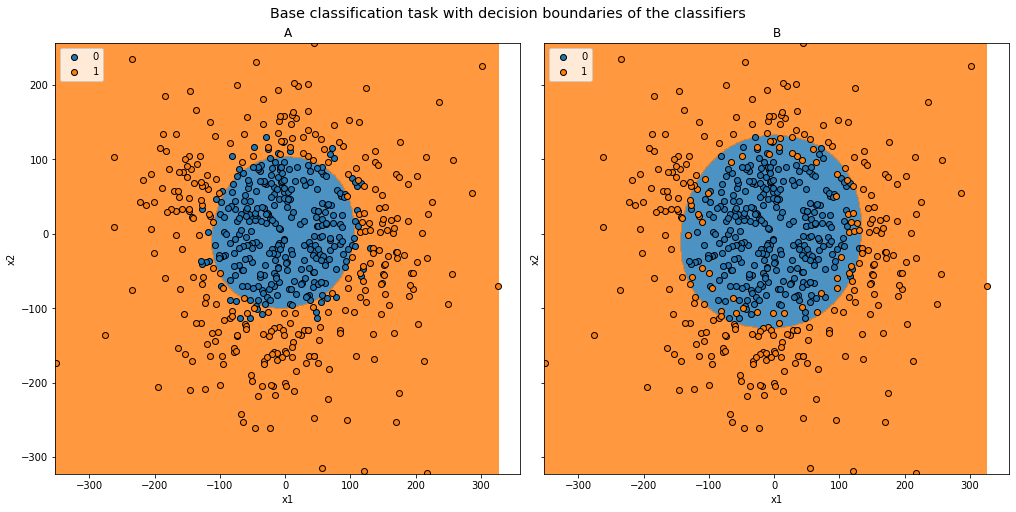

In [5]:
comparer.plot_individual_clf_decision_boundaries(X, y_true=y, kind='label', mesh_step_size=1)

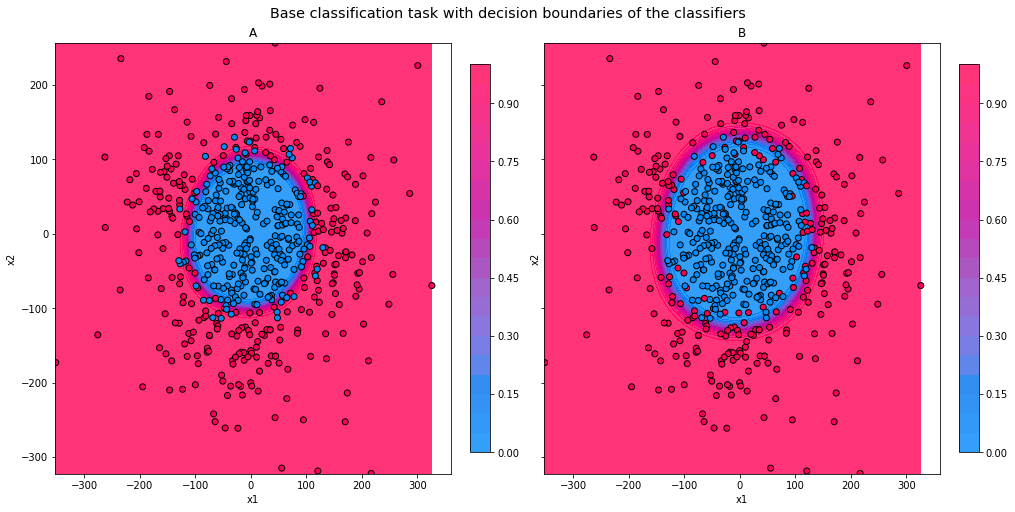

In [6]:
comparer.plot_individual_clf_decision_boundaries(X, y_true=y, kind='proba', mesh_step_size=1)

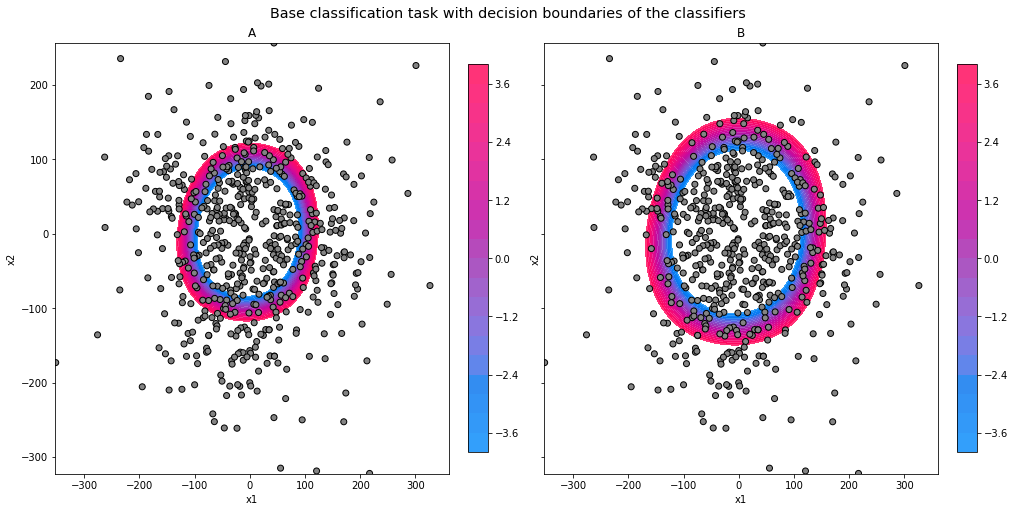

In [8]:
comparer.plot_individual_clf_decision_boundaries(X, y_true=y, kind='log-odds', mesh_step_size=1)

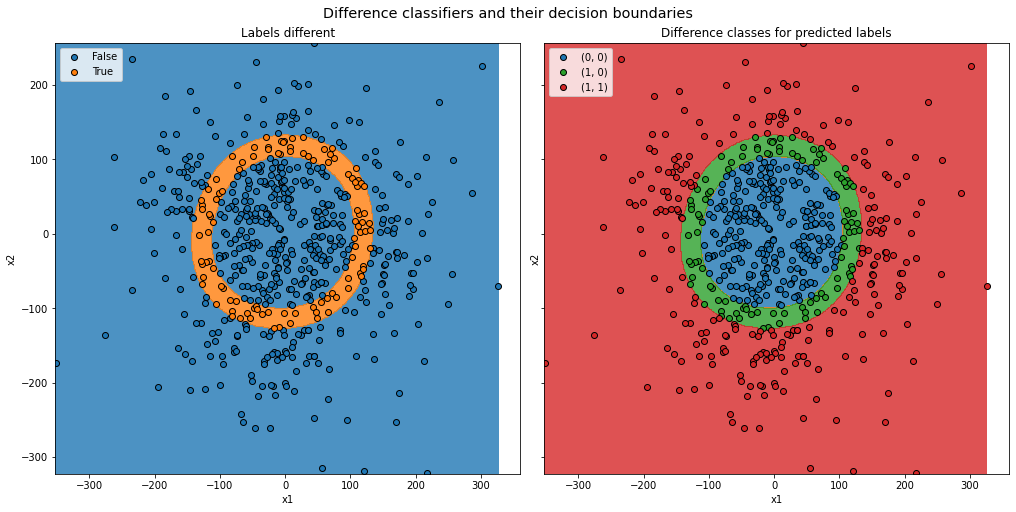

In [18]:
comparer.plot_decision_boundaries(X, mesh_step_size=1)

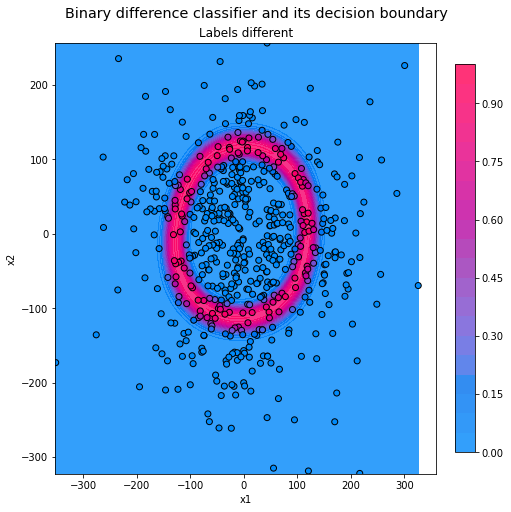

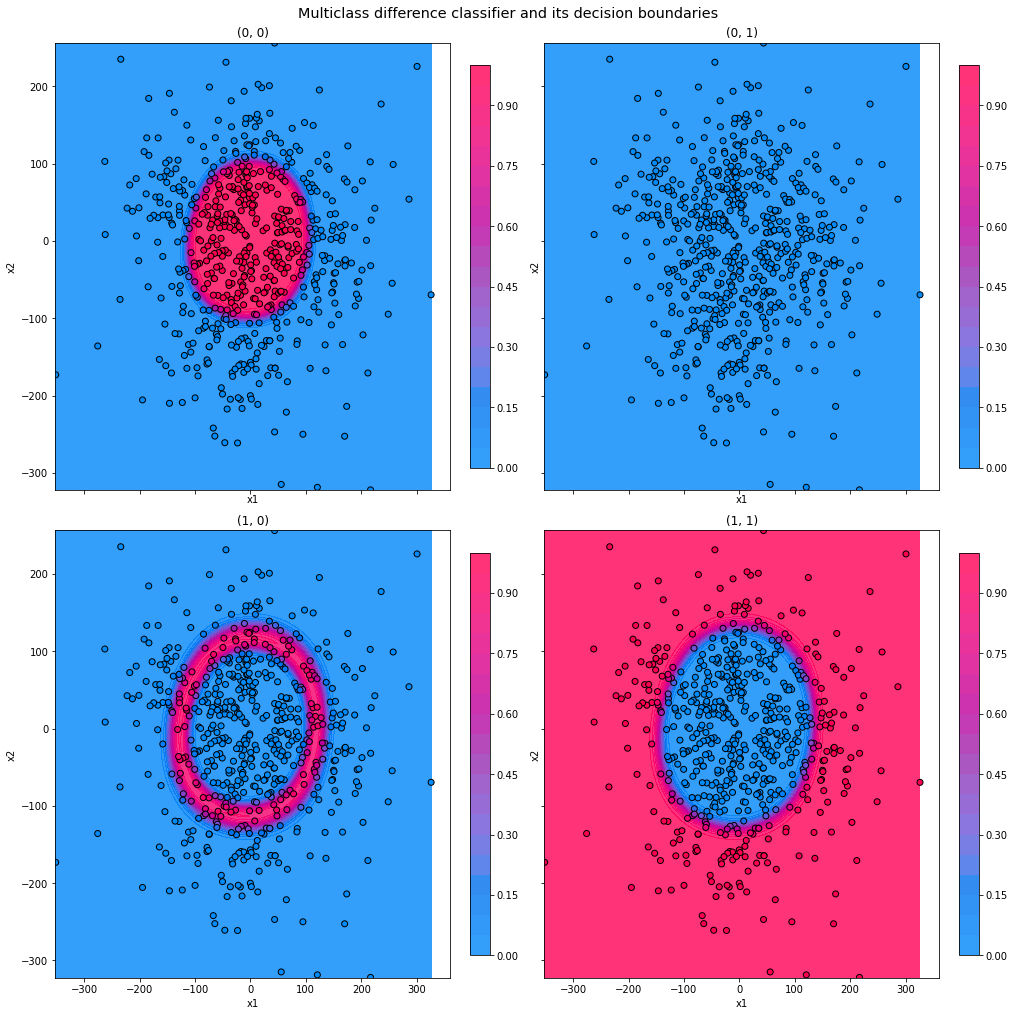

In [19]:
comparer.plot_decision_boundaries(X, kind='proba', mesh_step_size=1)

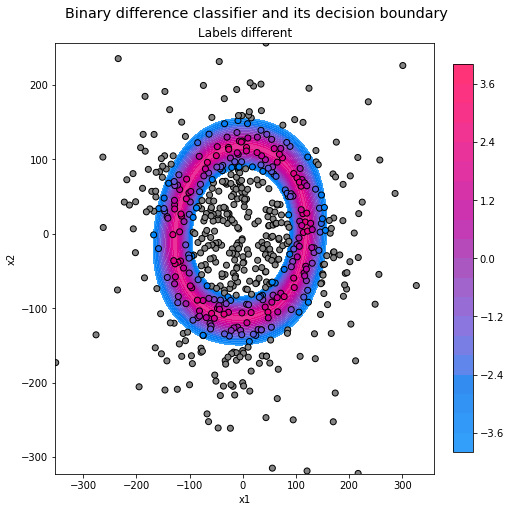

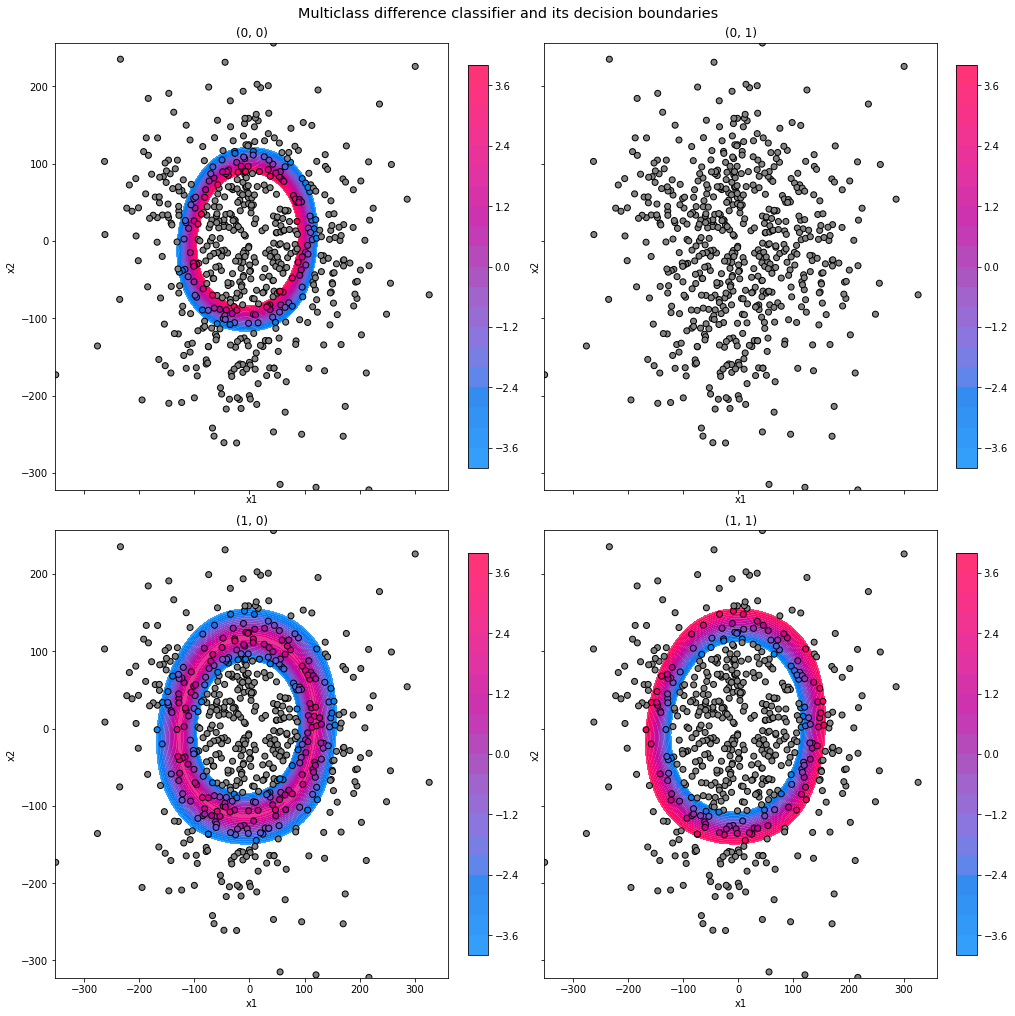

In [7]:
comparer.plot_decision_boundaries(X, kind='log-odds', mesh_step_size=1)

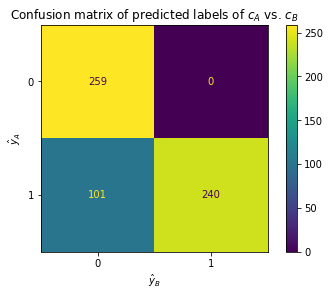

In [9]:
comparer.plot_confusion_matrix(X)

In [10]:
%%time
masker = shap.maskers.Independent(data=X, max_samples=X.shape[0])
explanations, indices_nonfinite_predictions, explanations_nonfinite = \
    generate_shap_explanations(comparer, X, masker=masker,
                               explanation_types=['indiv', 'mclass_diff'],
                               space_types=['labels', 'proba', 'log_odds'])

Exact explainer: 601it [00:31, 14.90it/s]                         
Exact explainer: 601it [00:26, 13.67it/s]                         
Exact explainer: 601it [00:29, 13.26it/s]                         
Exact explainer: 601it [00:29, 13.27it/s]                         
Exact explainer: 601it [00:30, 13.06it/s]                         
Exact explainer: 601it [00:33, 11.73it/s]                         
Exact explainer: 601it [00:53,  9.04it/s]                         
Exact explainer: 601it [00:58,  8.47it/s]                         
Exact explainer: 601it [01:00,  8.22it/s]                         

CPU times: user 5min 40s, sys: 3.11 s, total: 5min 43s
Wall time: 5min 53s


In [11]:
with open('shap-values.all.pickle', 'wb') as f:
    pickle.dump((explanations, indices_nonfinite_predictions, explanations_nonfinite), f, pickle.HIGHEST_PROTOCOL)

In [12]:
xlim = explanations.data[:, 0].min() - 0.5, explanations.data[:, 0].max() + 0.5
ylim = explanations.data[:, 1].min() - 0.5, explanations.data[:, 1].max() + 0.5

# Traditional SHAP Explanations

## Labels

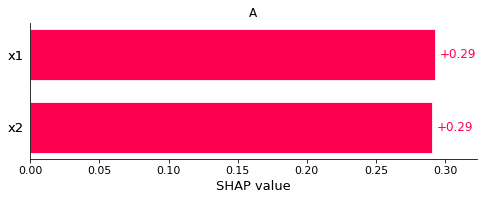

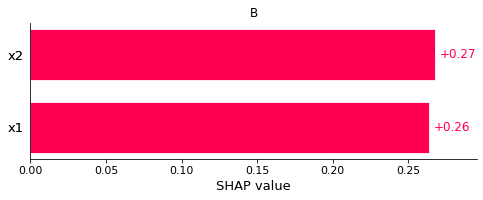

In [24]:
feature_order, feature_importance = calc_feature_order(explanations.indiv.labels.A[:, :, 1])
plot_feature_importance_bar(feature_importance, 'A', feature_order)
feature_order, feature_importance = calc_feature_order(explanations.indiv.labels.B[:, :, 1])
plot_feature_importance_bar(feature_importance, 'B', feature_order)

In [25]:
node, Z = make_clustering(comparer, explanations.indiv.labels[:, :, 1])

root
(0, 0)    259
(1, 1)    240
(1, 0)    101
dtype: int64


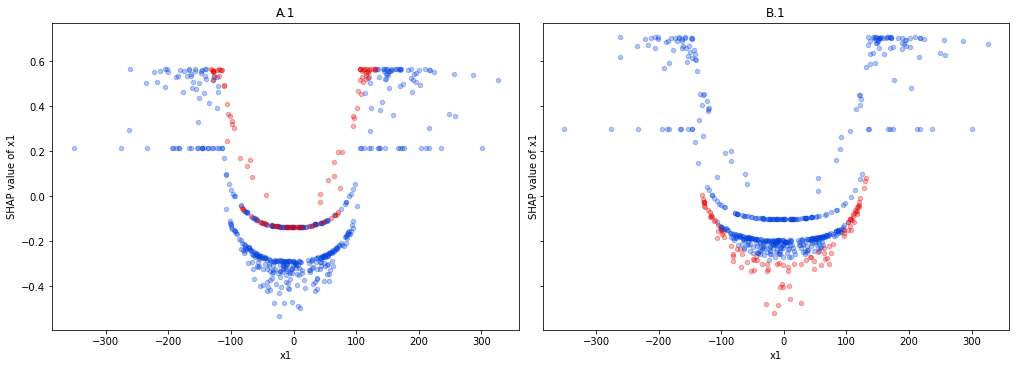

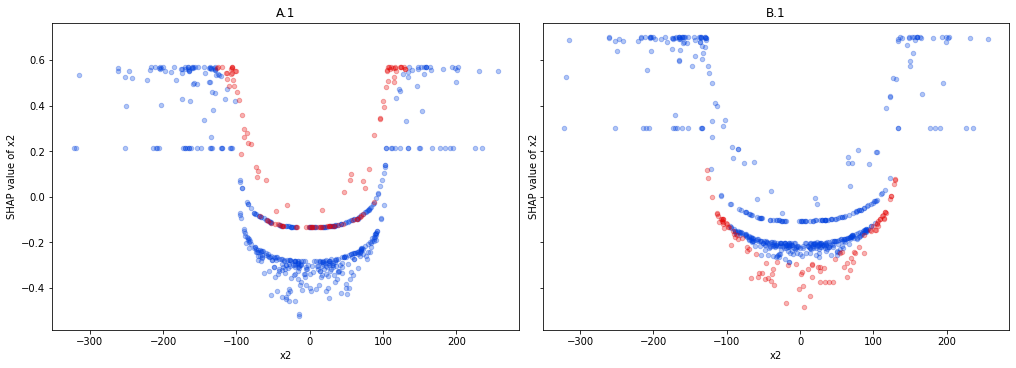

In [26]:
for feature in comparer.feature_names:
    node.plot_feature(feature, alpha=0.3)

## Probability

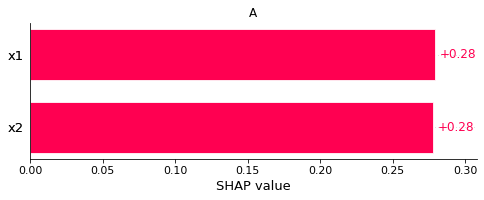

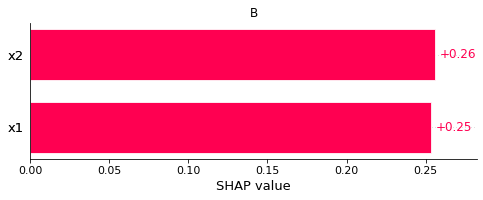

In [27]:
feature_order, feature_importance = calc_feature_order(explanations.indiv.proba.A[:, :, 1])
plot_feature_importance_bar(feature_importance, 'A', feature_order)
feature_order, feature_importance = calc_feature_order(explanations.indiv.proba.B[:, :, 1])
plot_feature_importance_bar(feature_importance, 'B', feature_order)

In [28]:
node, Z = make_clustering(comparer, explanations.indiv.proba[:, :, 1])

root
(0, 0)    259
(1, 1)    240
(1, 0)    101
dtype: int64


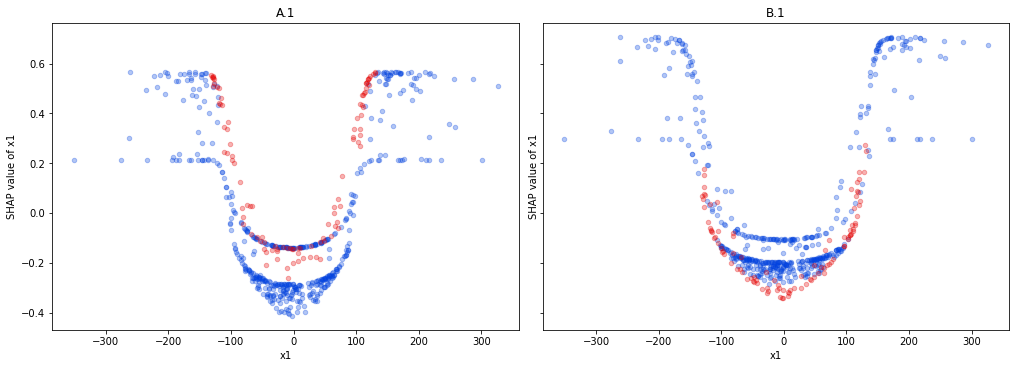

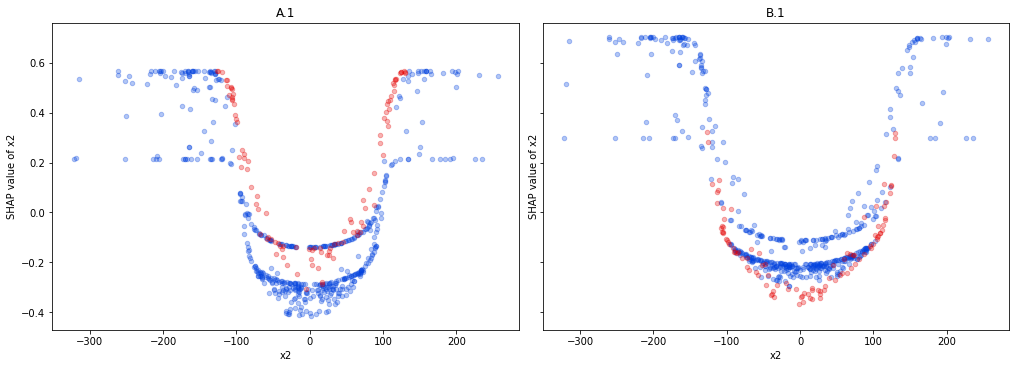

In [29]:
for feature in comparer.feature_names:
    node.plot_feature(feature, alpha=0.3)

## Log Odds

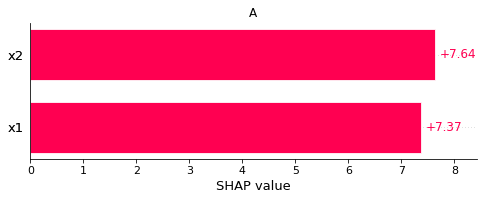

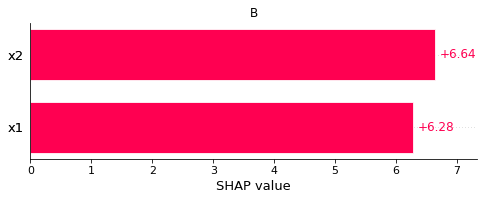

In [30]:
feature_order, feature_importance = calc_feature_order(explanations.indiv.log_odds.A[:, :, 1])
plot_feature_importance_bar(feature_importance, 'A', feature_order)
feature_order, feature_importance = calc_feature_order(explanations.indiv.log_odds.B[:, :, 1])
plot_feature_importance_bar(feature_importance, 'B', feature_order)

In [31]:
node, Z = make_clustering(comparer, explanations.indiv.log_odds[:, :, 1])

root
(0, 0)    259
(1, 1)    240
(1, 0)    101
dtype: int64


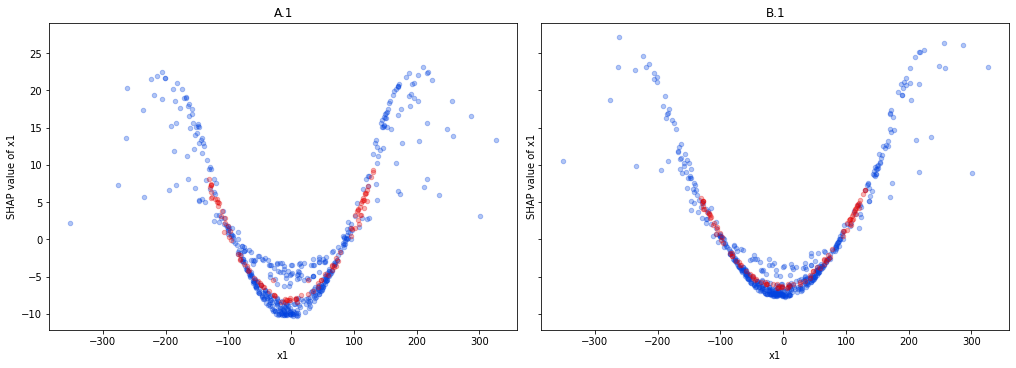

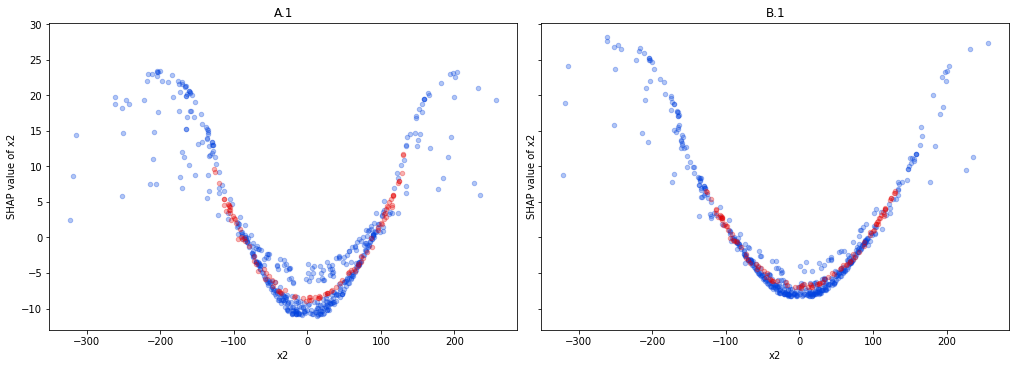

In [32]:
for feature in comparer.feature_names:
    node.plot_feature(feature, alpha=0.3)

# Difference Classifier SHAP Explanations

## Labels

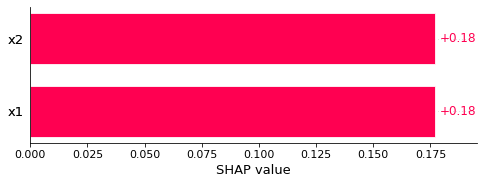

In [33]:
feature_order, feature_importances = calc_feature_order(explanations.mclass_diff.labels)
plot_feature_importance_bar(feature_importances)

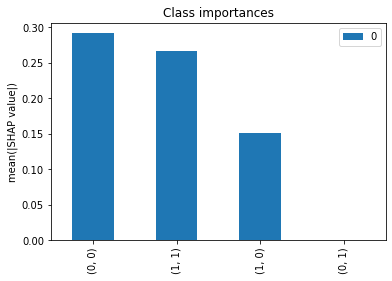

In [34]:
class_order, class_importances = calc_class_order(explanations.mclass_diff.labels)
plot_class_importances(class_importances, class_order, explanations.mclass_diff.output_names)

root
(0, 0)    259
(1, 1)    240
(1, 0)    101
dtype: int64


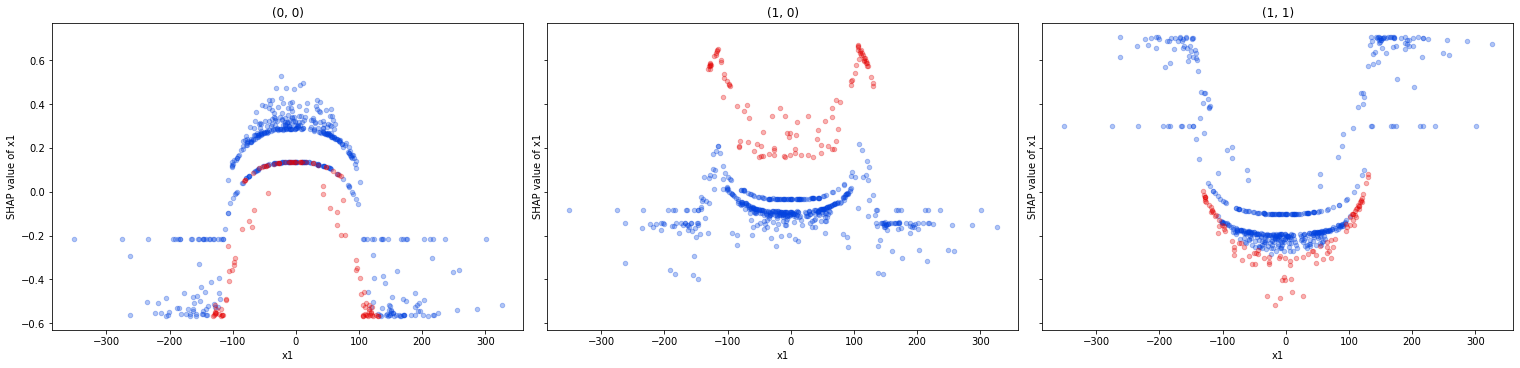

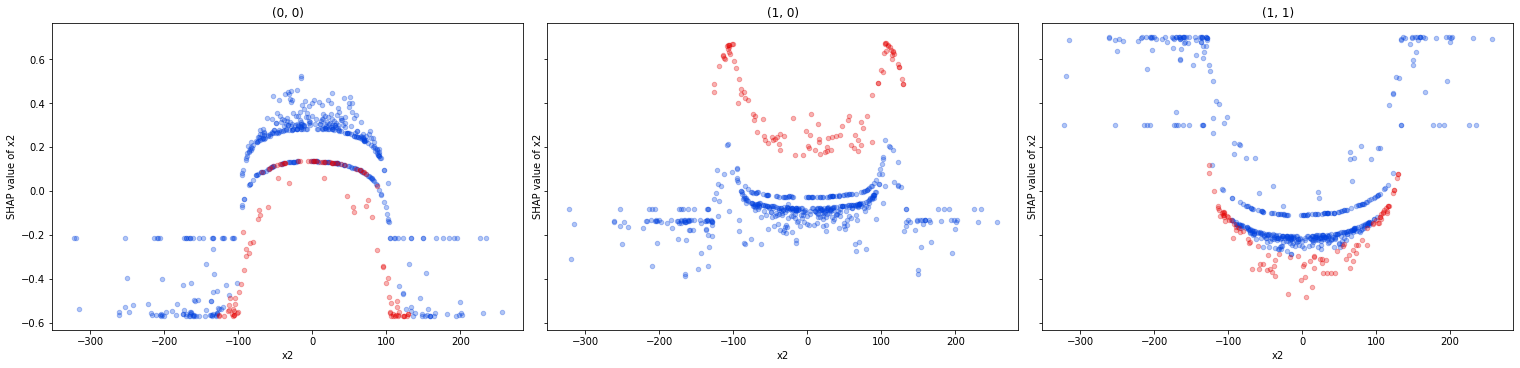

In [40]:
node, Z = make_clustering(comparer, explanations.mclass_diff.labels, '(1, 0)', ['(0, 0)', '(1, 0)', '(1, 1)'])
for feature in comparer.feature_names:
    node.plot_feature(feature, alpha=0.3)

## Probability

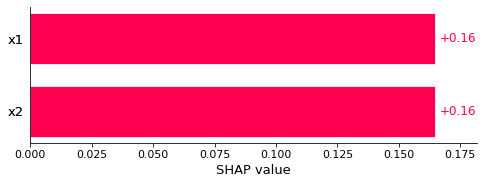

In [35]:
feature_order, feature_importances = calc_feature_order(explanations.mclass_diff.proba)
plot_feature_importance_bar(feature_importances)

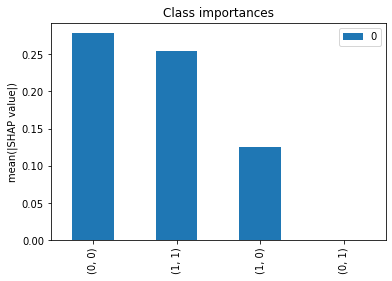

In [36]:
class_order, class_importances = calc_class_order(explanations.mclass_diff.proba)
plot_class_importances(class_importances, class_order, explanations.mclass_diff.output_names)

root
(0, 0)    259
(1, 1)    240
(1, 0)    101
dtype: int64


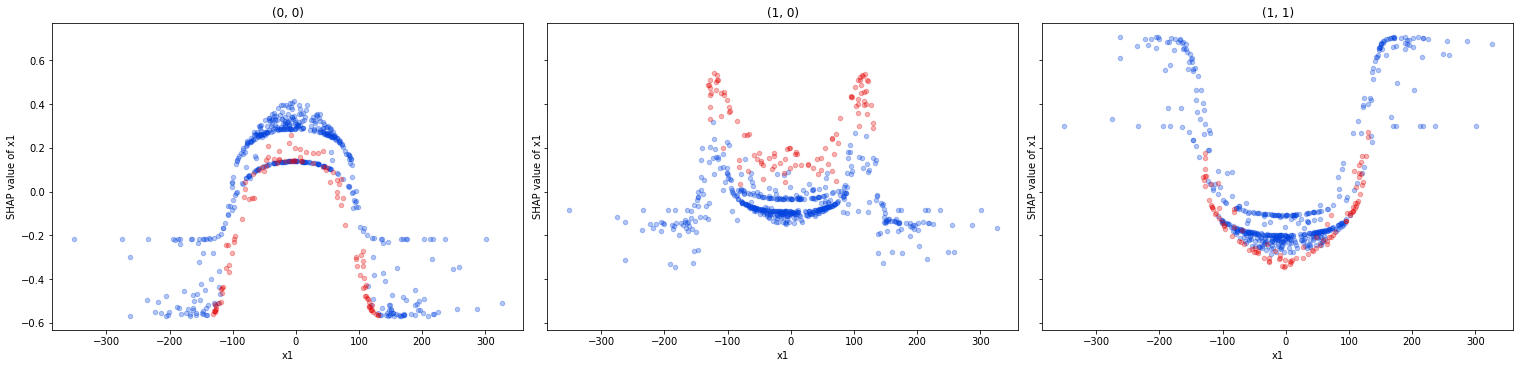

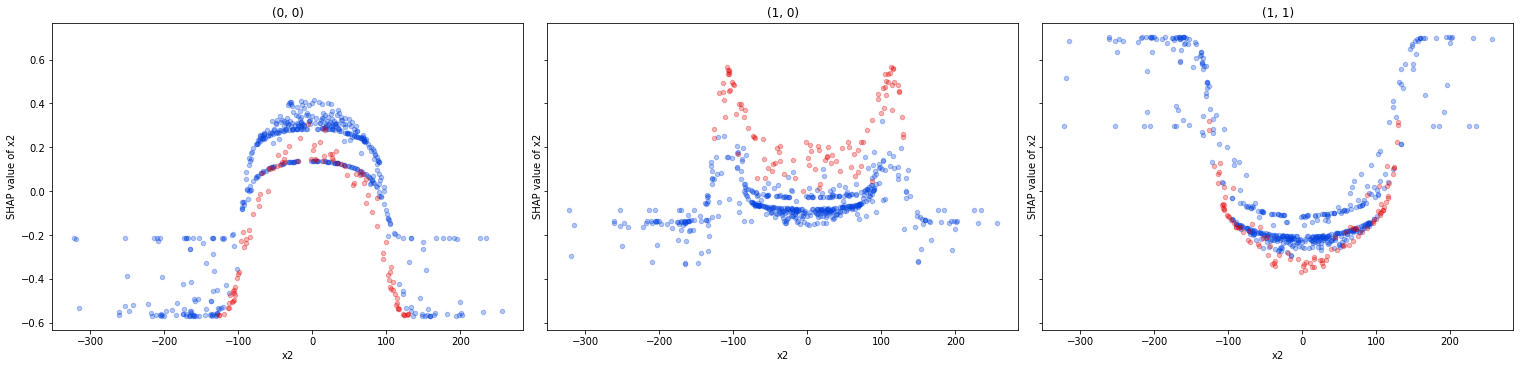

In [41]:
node, Z = make_clustering(comparer, explanations.mclass_diff.proba, '(1, 0)', ['(0, 0)', '(1, 0)', '(1, 1)'])
for feature in comparer.feature_names:
    node.plot_feature(feature, alpha=0.3)

## Log Odds

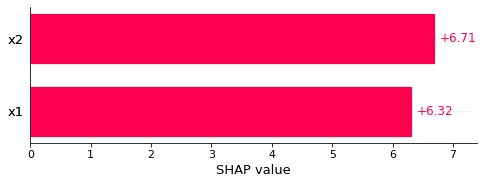

In [37]:
feature_order, feature_importances = calc_feature_order(explanations.mclass_diff.log_odds)
plot_feature_importance_bar(feature_importances)

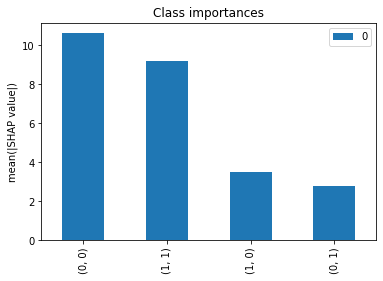

In [38]:
class_order, class_importances = calc_class_order(explanations.mclass_diff.log_odds)
plot_class_importances(class_importances, class_order, explanations.mclass_diff.output_names)

root
(0, 0)    259
(1, 1)    240
(1, 0)    101
dtype: int64


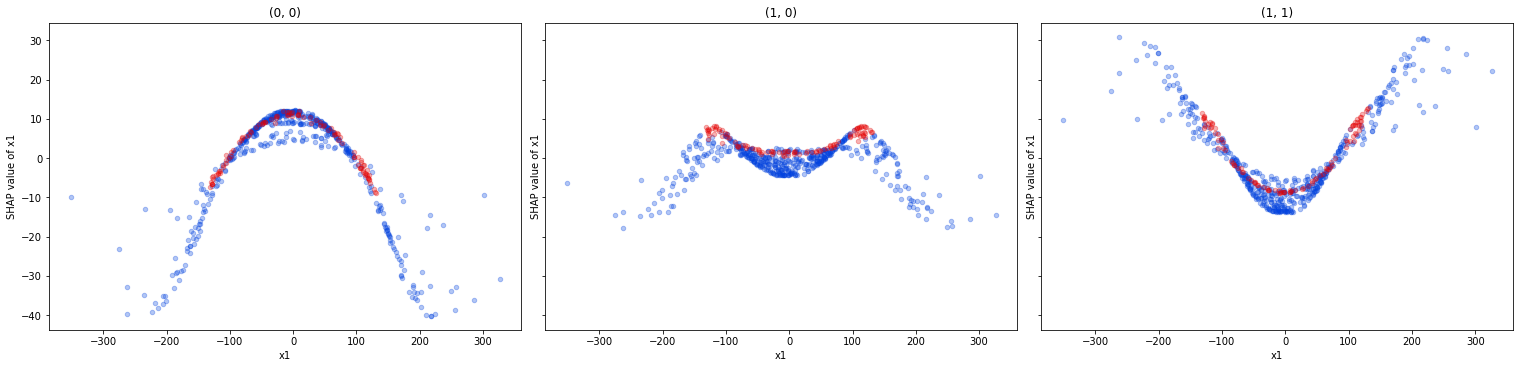

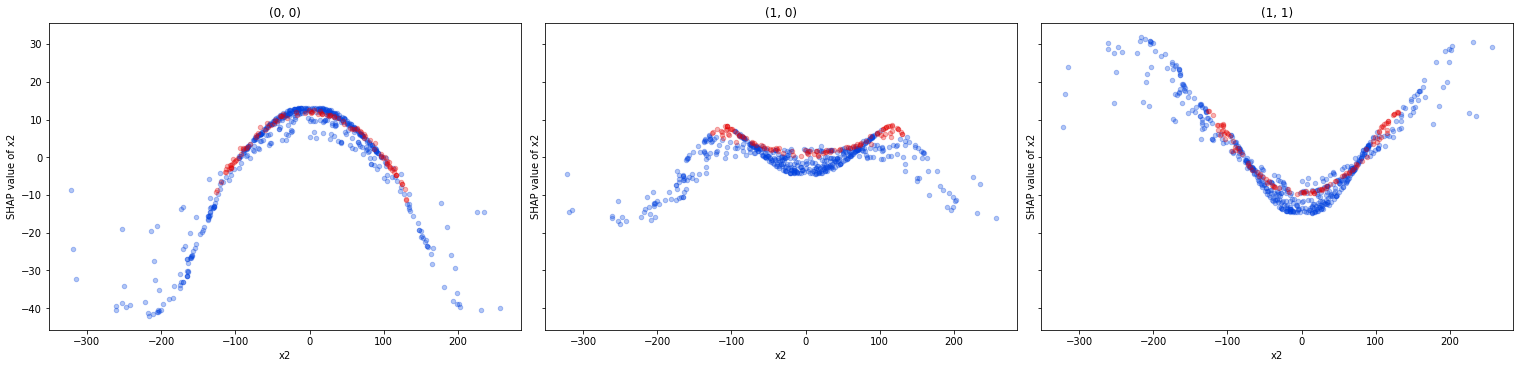

In [42]:
node, Z = make_clustering(comparer, explanations.mclass_diff.log_odds, '(1, 0)', ['(0, 0)', '(1, 0)', '(1, 1)'])
for feature in comparer.feature_names:
    node.plot_feature(feature, alpha=0.3)